# 30 Days of ML competition!

## About the data

The dataset is used for this competition is synthetic, but based on a real dataset. The original dataset deals with predicting the amount of an insurance claim. Although the features are anonymized, they have properties relating to real-world features.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/30-days-of-ml/sample_submission.csv
/kaggle/input/30-days-of-ml/train.csv
/kaggle/input/30-days-of-ml/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(rc={'figure.figsize':(15,12)})

## Data Exploration

In [3]:
train_ds = pd.read_csv('../input/30-days-of-ml/train.csv')
test_ds = pd.read_csv('../input/30-days-of-ml/test.csv')

train_ds.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,B,B,B,C,B,B,A,E,C,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,2,B,B,A,A,B,D,A,F,A,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,3,A,A,A,C,B,D,A,D,A,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,4,B,B,A,C,B,D,A,E,C,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,6,A,A,A,C,B,D,A,E,A,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


In [4]:
train_ds.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250018.576947,0.527335,0.460926,0.490498,0.496689,0.491654,0.510526,0.467476,0.537119,0.498456,0.474872,0.474492,0.473216,0.494561,0.508273,8.241979
std,144450.150010,0.230599,0.214003,0.253346,0.219199,0.240074,0.228232,0.210331,0.218140,0.239920,0.218007,0.255949,0.222022,0.247292,0.222950,0.746555
min,1.000000,-0.118039,-0.069309,-0.056104,0.130676,0.255908,0.045915,-0.224689,0.203763,-0.260275,0.117896,0.048732,0.052608,-0.074208,0.151050,0.140329
25%,124772.500000,0.405965,0.310494,0.300604,0.329783,0.284188,0.354141,0.342873,0.355825,0.332486,0.306874,0.276017,0.308151,0.289074,0.300669,7.742071
50%,250002.500000,0.497053,0.427903,0.502462,0.465026,0.390470,0.488865,0.429383,0.504661,0.439151,0.434620,0.459975,0.433812,0.422887,0.472400,8.191373
75%,375226.500000,0.668060,0.615113,0.647512,0.664451,0.696599,0.669625,0.573383,0.703441,0.606056,0.614333,0.691579,0.642057,0.714502,0.758447,8.728634
max,499999.000000,1.058443,0.887253,1.034704,1.039560,1.055424,1.067649,1.111552,1.032837,1.040229,0.982922,1.055960,1.071444,0.975035,0.905992,10.411992


In [5]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cont0   300000 non-null  float64
 12  cont1   300000 non-null  float64
 13  cont2   300000 non-null  float64
 14  cont3   300000 non-null  float64
 15  cont4   300000 non-null  float64
 16  cont5   300000 non-null  float64
 17  cont6   300000 non-null  float64
 18  cont7   300000 non-null  float64
 19  cont8   300000 non-null  float64
 20  cont9   300000 non-null  float64
 21  cont10  30

In [6]:
test_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      200000 non-null  int64  
 1   cat0    200000 non-null  object 
 2   cat1    200000 non-null  object 
 3   cat2    200000 non-null  object 
 4   cat3    200000 non-null  object 
 5   cat4    200000 non-null  object 
 6   cat5    200000 non-null  object 
 7   cat6    200000 non-null  object 
 8   cat7    200000 non-null  object 
 9   cat8    200000 non-null  object 
 10  cat9    200000 non-null  object 
 11  cont0   200000 non-null  float64
 12  cont1   200000 non-null  float64
 13  cont2   200000 non-null  float64
 14  cont3   200000 non-null  float64
 15  cont4   200000 non-null  float64
 16  cont5   200000 non-null  float64
 17  cont6   200000 non-null  float64
 18  cont7   200000 non-null  float64
 19  cont8   200000 non-null  float64
 20  cont9   200000 non-null  float64
 21  cont10  20

### Removing ID columns and seperating label from features

In [7]:
train_ds.drop(columns=['id'], inplace=True)

In [8]:
X, y = train_ds.drop(columns=['target']), train_ds['target']

### Getting column names by their type

In [9]:
cat_cols = X.select_dtypes(include='object').columns
numeric_cols = X.select_dtypes(include='float').columns

## Visualisation

### 1. Correlation between numeric columns

In [10]:
corr = X[numeric_cols].corr()
corr

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
cont0,1.000000,-0.009422,-0.296989,0.211333,-0.109776,0.392456,0.133995,0.294687,0.388510,0.394969,0.363413,0.255941,0.417872,0.023234
cont1,-0.009422,1.000000,-0.000627,-0.002233,-0.000285,0.003812,0.001321,0.013475,-0.021541,-0.002727,-0.001648,-0.017221,-0.006862,-0.010097
cont2,-0.296989,-0.000627,1.000000,-0.180856,0.092780,-0.300140,-0.141724,-0.283989,-0.326456,-0.309118,-0.300273,-0.325023,-0.352009,-0.039815
cont3,0.211333,-0.002233,-0.180856,1.000000,-0.069934,0.201441,0.040133,0.172586,0.185221,0.194807,0.199525,0.140934,0.255117,0.037920
cont4,-0.109776,-0.000285,0.092780,-0.069934,1.000000,-0.148807,-0.044417,-0.095653,-0.122594,-0.123468,-0.132211,-0.115173,-0.151080,-0.012798
cont5,0.392456,0.003812,-0.300140,0.201441,-0.148807,1.000000,0.211800,0.329357,0.392057,0.411366,0.402053,0.308249,0.473964,0.053779
cont6,0.133995,0.001321,-0.141724,0.040133,-0.044417,0.211800,1.000000,0.135333,0.117833,0.187303,0.178168,0.168731,0.171010,0.031183
cont7,0.294687,0.013475,-0.283989,0.172586,-0.095653,0.329357,0.135333,1.000000,0.332639,0.320239,0.283414,0.279405,0.363091,0.056958
cont8,0.388510,-0.021541,-0.326456,0.185221,-0.122594,0.392057,0.117833,0.332639,1.000000,0.406517,0.341430,0.297121,0.434196,0.050163
cont9,0.394969,-0.002727,-0.309118,0.194807,-0.123468,0.411366,0.187303,0.320239,0.406517,1.000000,0.361941,0.327866,0.437776,0.044631


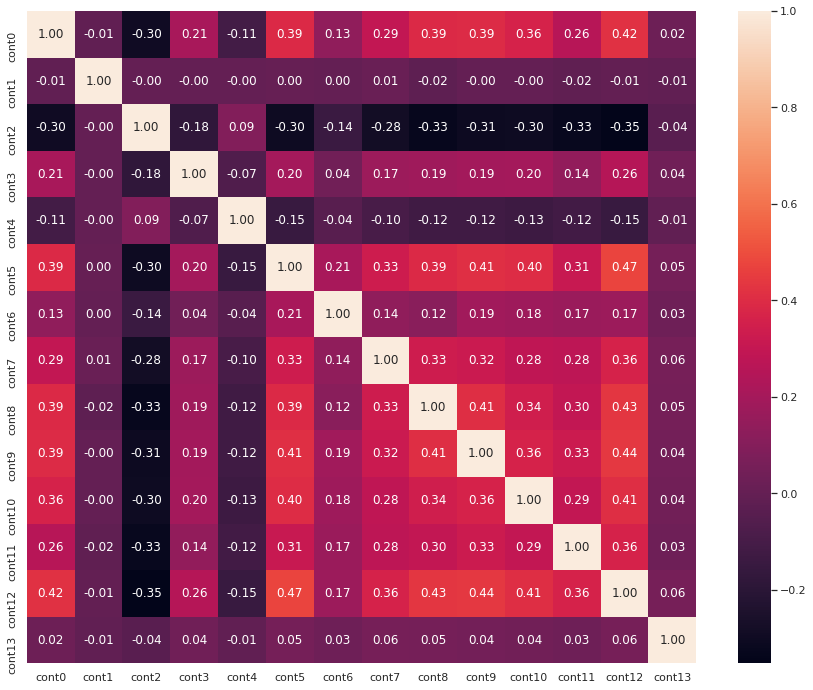

In [11]:
ax = sns.heatmap(corr, annot=True, fmt=".2f")

Cont1 and Cont13 have very weak correlation with other continues features. I will probobly will be removing them later on.

### Distributions

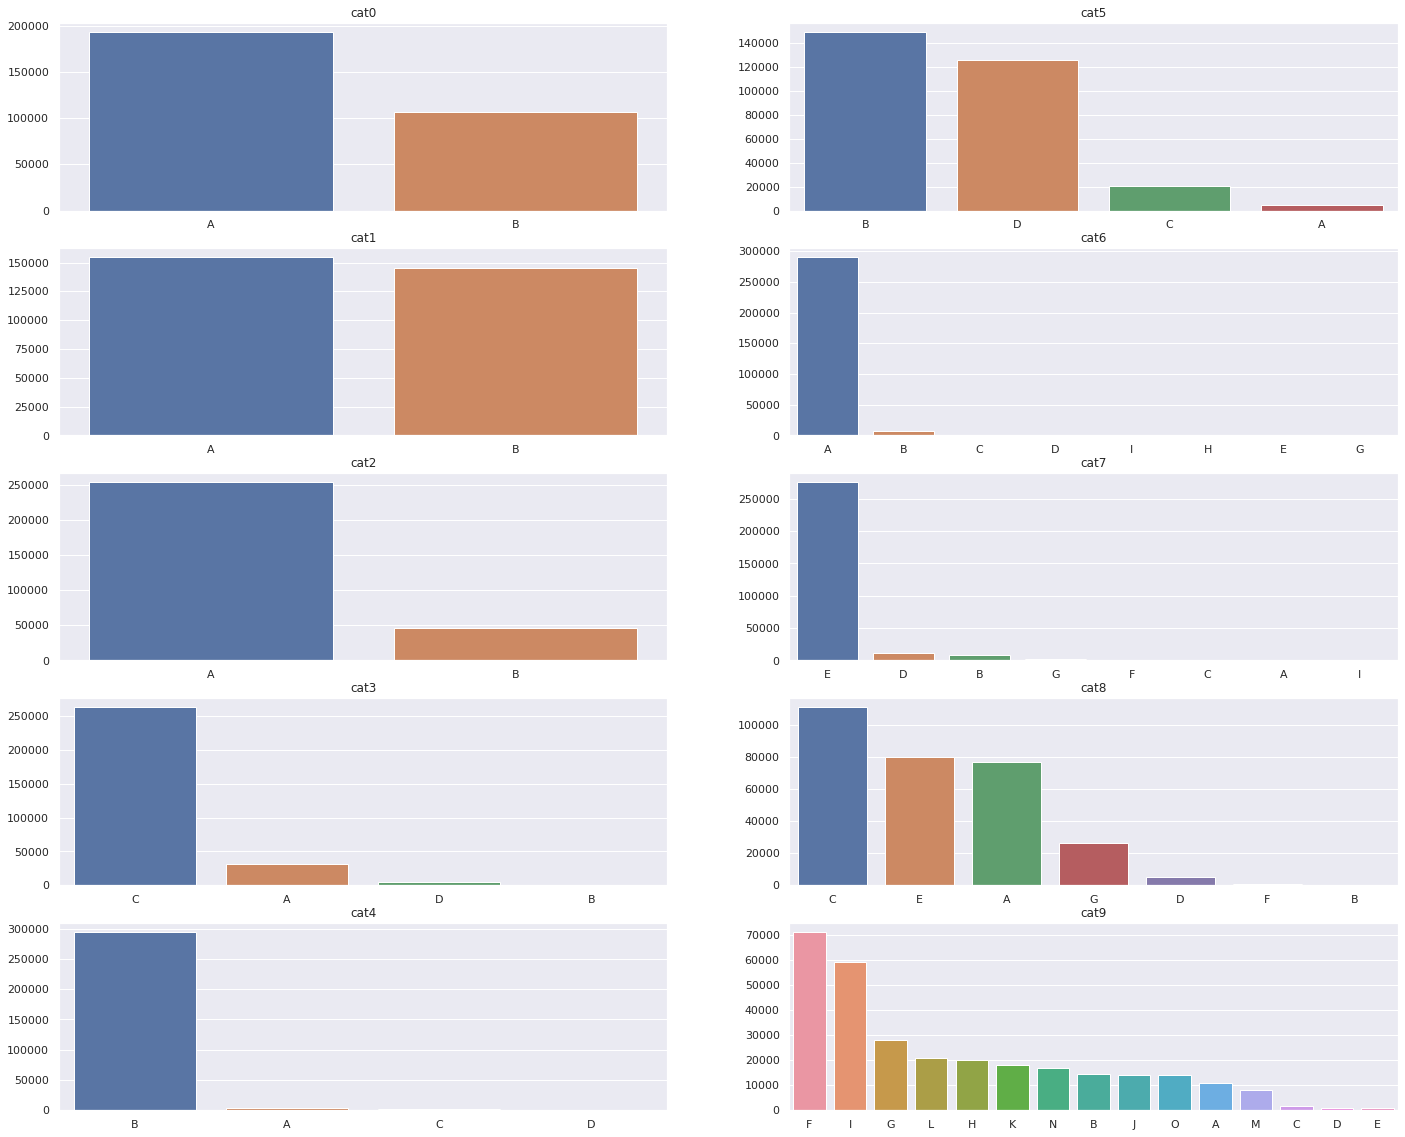

In [12]:
fig, axis= plt.subplots(5,2, figsize=(24,20))

for i, col in enumerate(cat_cols):
    ds = X[col].value_counts()
    sns.barplot(x=ds.index,y=ds.values, ax=axis[i % 5,i // 5]).set_title(col)

cat2 cat3 cat4 cat6 and cat7 are imbalanced. Will have to figure out what to do with it

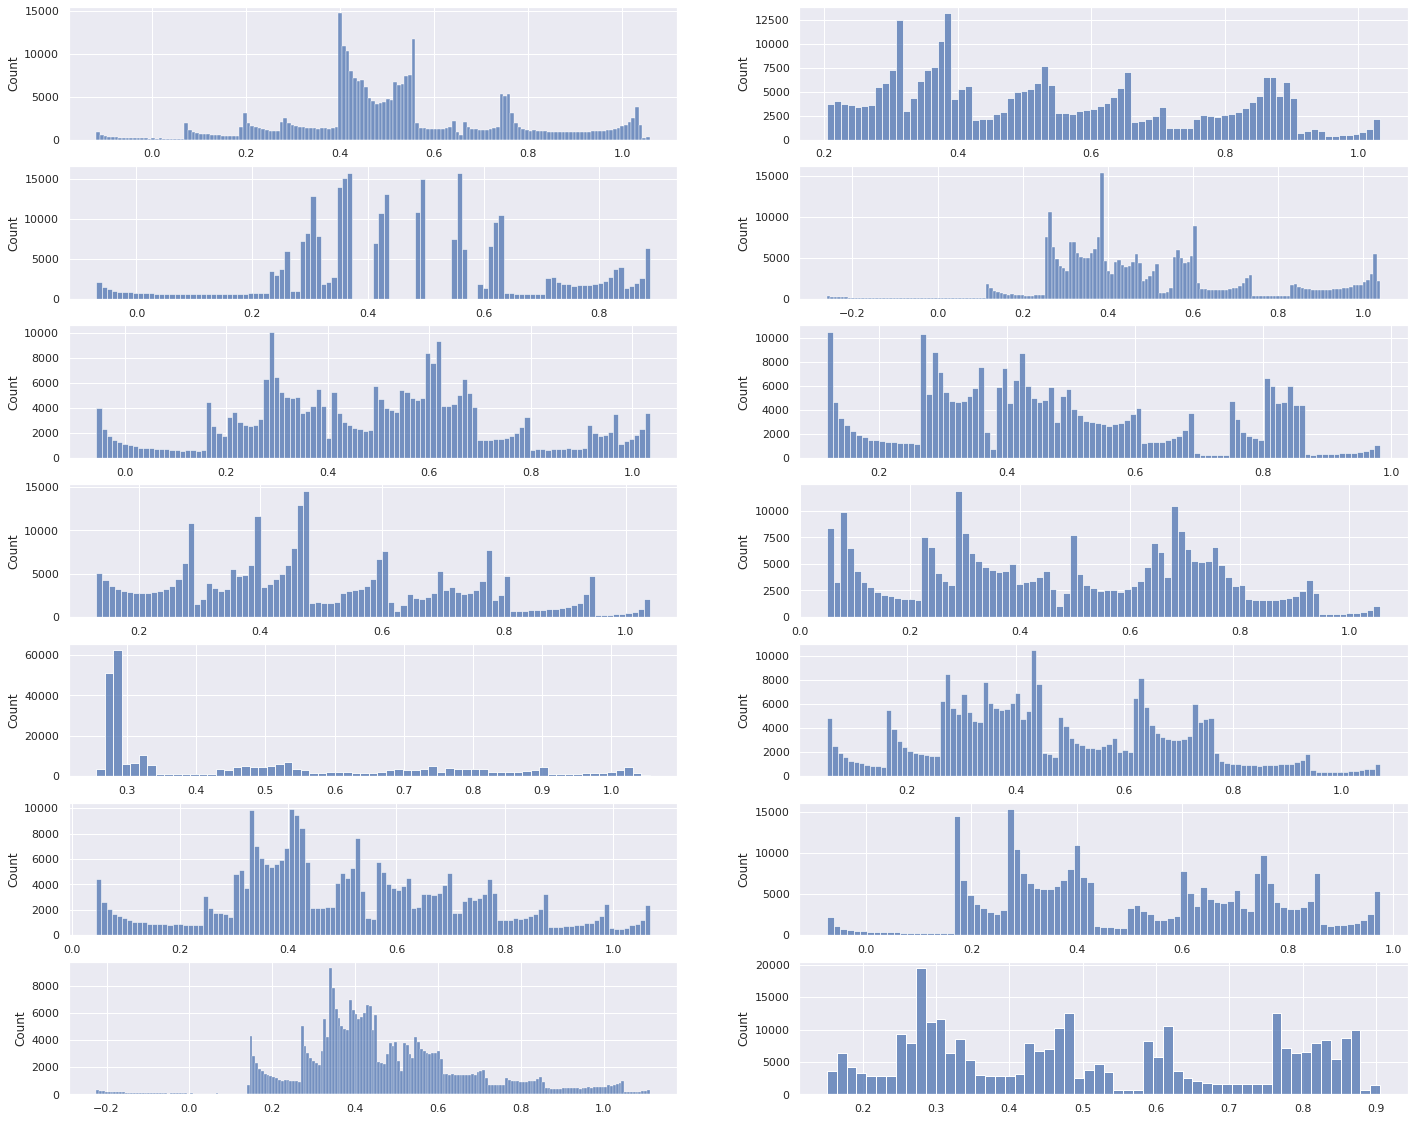

In [13]:
fig, axis= plt.subplots(7,2, figsize=(24,20))
for i, num in enumerate(numeric_cols):
    sns.histplot(X[num].values, ax=axis[i % 7,i // 7])

## Encoding categorical values

In [14]:
print(X.shape)
for cat in cat_cols:
    dum = pd.get_dummies(X[cat], prefix=cat+'_')
    X = pd.merge(left=X, right=dum, left_index=True, right_index=True)
    X.drop(columns=[cat], inplace=True)
print(X.shape)
X.head()

(300000, 24)
(300000, 70)


,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,...,cat9__F,cat9__G,cat9__H,cat9__I,cat9__J,cat9__K,cat9__L,cat9__M,cat9__N,cat9__O
0,0.201470,-0.014822,0.669699,0.136278,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,...,0,0,0,0,0,0,0,0,1,0
1,0.743068,0.367411,1.021605,0.365798,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,...,0,0,0,0,0,0,0,0,0,1
2,0.742708,0.310383,-0.012673,0.576957,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,...,1,0,0,0,0,0,0,0,0,0
3,0.429551,0.620998,0.577942,0.280610,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,...,0,0,0,0,0,1,0,0,0,0
4,1.058291,0.367492,-0.052389,0.232407,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,...,0,0,0,0,0,0,0,0,1,0


In [31]:
test_ds = pd.read_csv('../input/30-days-of-ml/test.csv')
ids = test_ds['id']

In [32]:
test_ds.drop(columns=['id'], inplace=True)
print(test_ds.shape)
for cat in cat_cols:
    dum = pd.get_dummies(test_ds[cat], prefix=cat+'_')
    test_ds = pd.merge(left=test_ds, right=dum, left_index=True, right_index=True)
    test_ds.drop(columns=[cat], inplace=True)
print(test_ds.shape)

(200000, 24)
(200000, 70)


## Modeling

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor

from math import sqrt

In [16]:
models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('Lasso', Lasso()))
#models.append(('LogisticRegression', LogisticRegression()))
#models.append(('SVR', SVR()))
models.append(('RandomForestRegressor', RandomForestRegressor()))
models.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
models.append(('ElasticNet', ElasticNet()))
models.append(('SGDRegressor', SGDRegressor()))
models.append(('AdaBoostRegressor', AdaBoostRegressor()))

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=.33, random_state=42)

In [18]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((201000, 70), (99000, 70), (201000,), (99000,))

In [19]:
def rmse(actual, predict):
    return mean_squared_error(actual, predict, squared=False)

rmse = make_scorer(rmse)

In [22]:
'''results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=73, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=rmse)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()} ({cv_results.std()})")'''

LinearRegression: 0.7392320535163656 (0.003196400754332244)
Lasso: 0.7473323199208981 (0.0034715613998735416)
RandomForestRegressor: 0.7364902682412046 (0.0027982277505338663)
DecisionTreeRegressor: 1.0537931891980106 (0.003913252188369188)
ElasticNet: 0.7473323199208981 (0.0034715613998735416)
SGDRegressor: 0.7402176823290835 (0.003157000445463454)
AdaBoostRegressor: 0.7479883411180536 (0.004321077216008447)


In [25]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

y_preds = rfr.predict(X_valid)


NameError: name 'y_pred' is not defined

In [28]:
mean_squared_error(y_valid, y_preds, squared=False)

0.73374884584692

In [33]:
submission_pred = rfr.predict(test_ds)

In [34]:
subm = pd.DataFrame({'id': ids, 'target':submission_pred})


NameError: name 'sumb' is not defined

In [35]:
subm.to_csv('submission.csv', index=False)